In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.integrate import solve_ivp
from collections import defaultdict
from functools import partial 
import scipy.integrate
from mpl_toolkits.mplot3d import axes3d
import matplotlib.patches as mpatches
%matplotlib inline

C:\Users\kdras\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


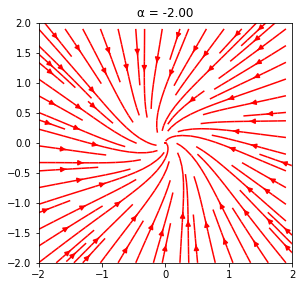

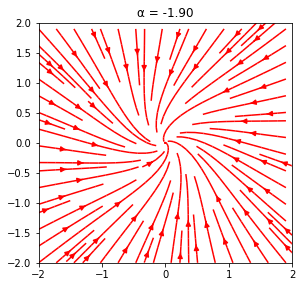

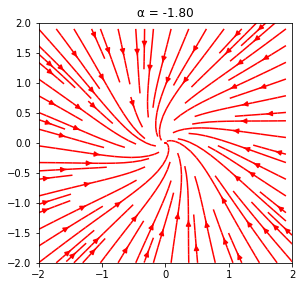

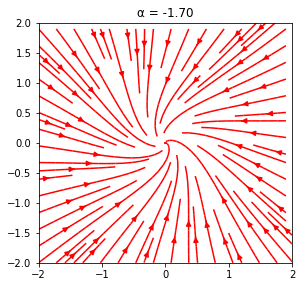

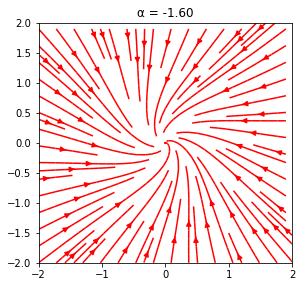

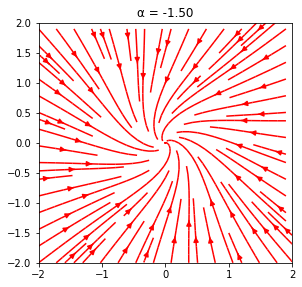

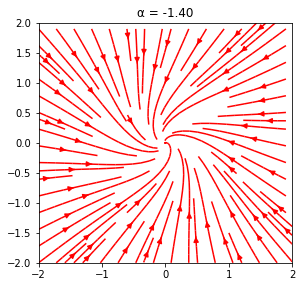

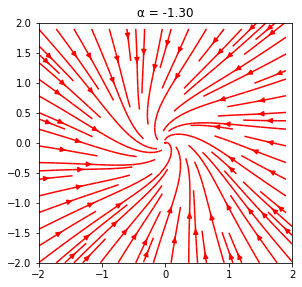

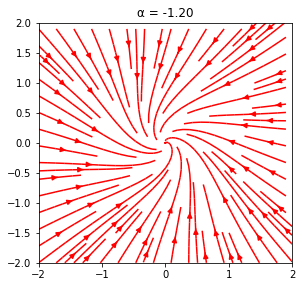

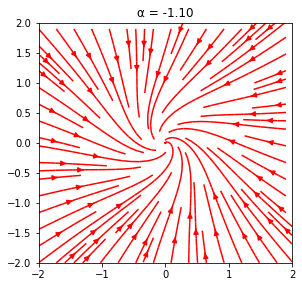

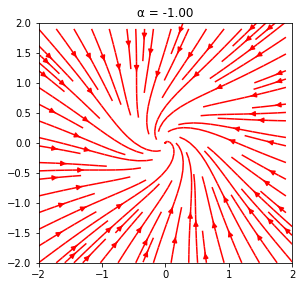

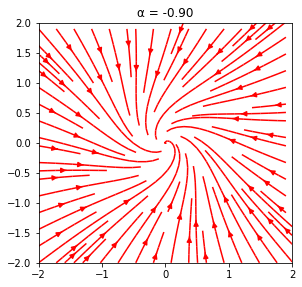

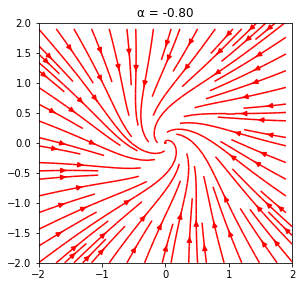

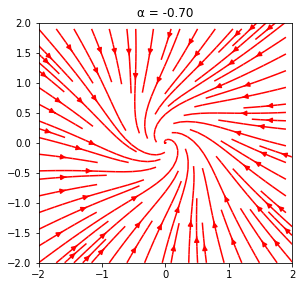

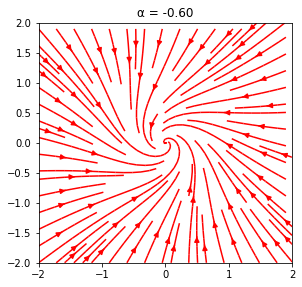

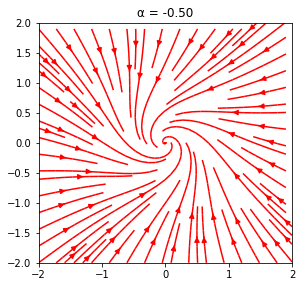

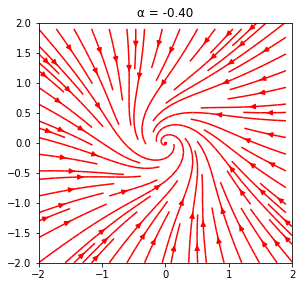

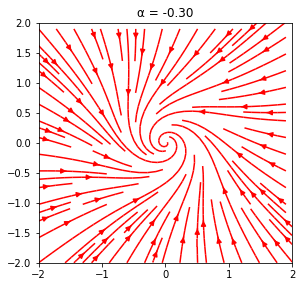

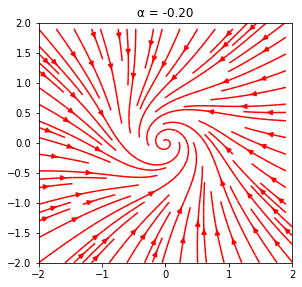

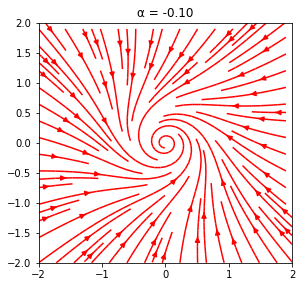

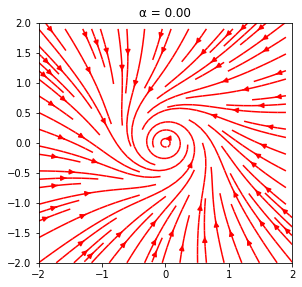

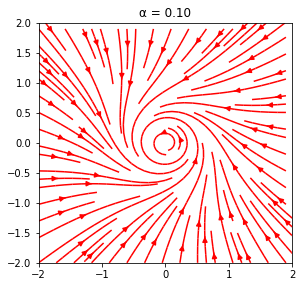

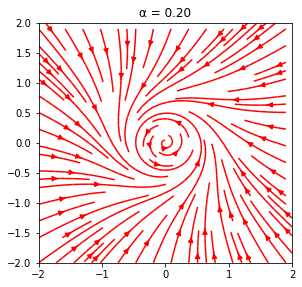

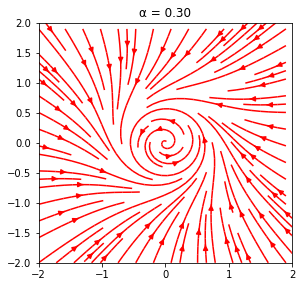

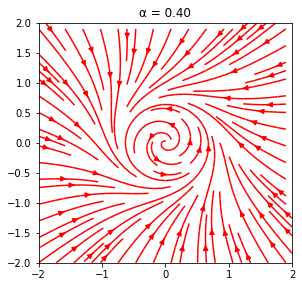

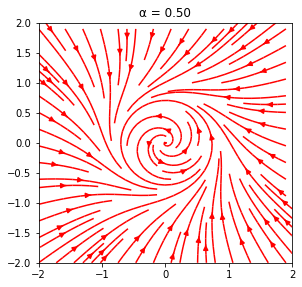

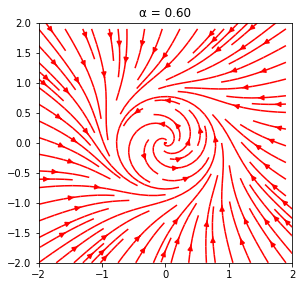

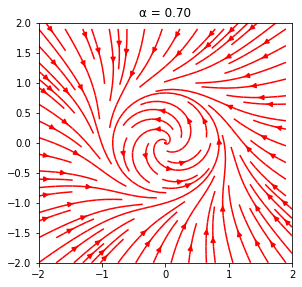

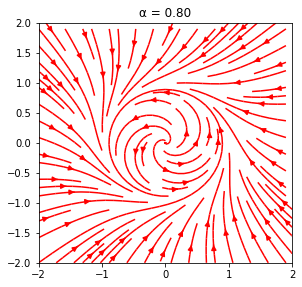

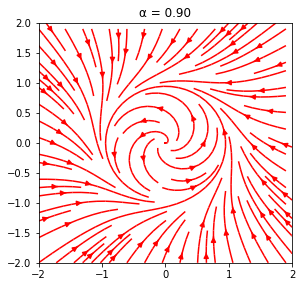

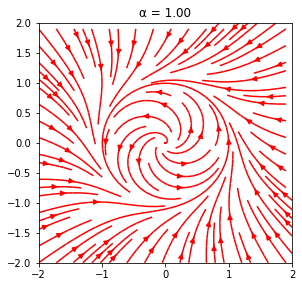

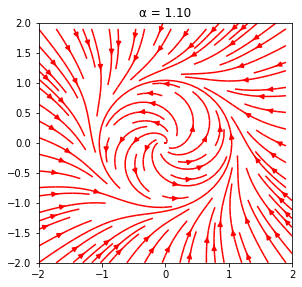

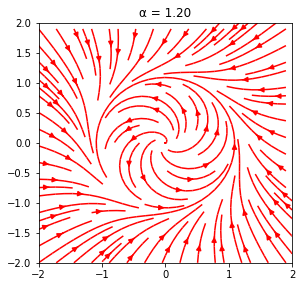

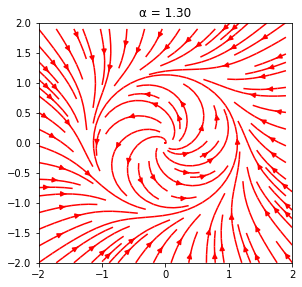

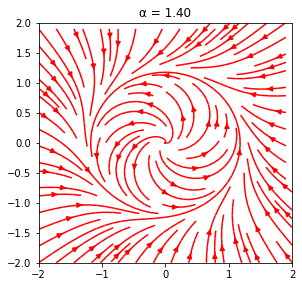

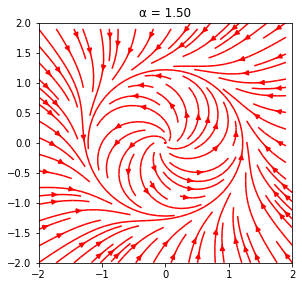

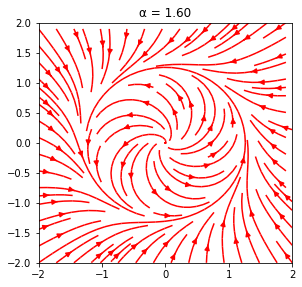

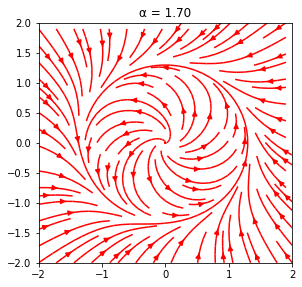

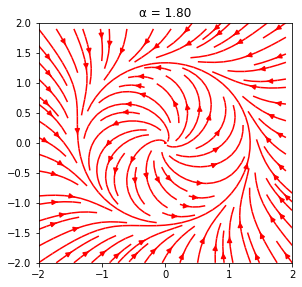

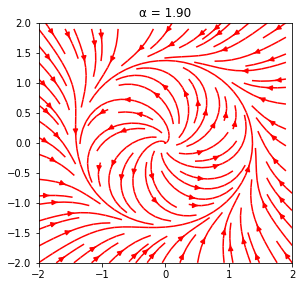

In [12]:
w = 2
x2, x1 = np.mgrid[-w:w:100j, -w:w:100j]

for alpha in np.arange(-2,2,0.1):  
    U = alpha * x1 - x2 - x1*(np.square(x1) + np.square(x2))
    V = x1 + alpha * x2 - x2*(np.square(x1) + np.square(x2))

    fig = plt.figure(figsize=(10, 20))
    gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

    #  Varying density along a streamline
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.streamplot(x1, x2, U, V, color='red')
    ax0.set_title(f"\u03B1 = {alpha:.2f}")

Text(0.5, 1.0, 'Two Orbits for α = 1')

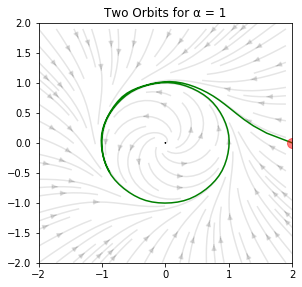

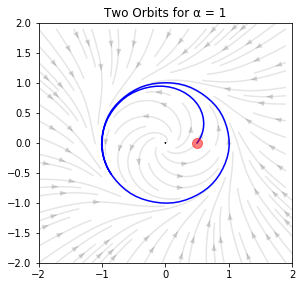

In [23]:
alpha = 1

def f(t, r):
    x1, x2 = r
    f1 = alpha * x1 - x2 - x1*(np.square(x1) + np.square(x2))
    f2 = x1 + alpha * x2 - x2*(np.square(x1) + np.square(x2))
    return f1, f2

sol = solve_ivp(f, (0, 10), (2, 0), t_eval=np.linspace(0, 10, 100))
xf, yf = sol.y

sol = solve_ivp(f, (0, 10), (0.5, 0), t_eval=np.linspace(0, 10, 100))
xs, ys = sol.y

U = alpha * x1 - x2 - x1*(np.square(x1) + np.square(x2))
V = x1 + alpha * x2 - x2*(np.square(x1) + np.square(x2))

fig = plt.figure(figsize=(10, 20))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(x1, x2, U, V, color=(0,0,0,.1))
ax0.plot(xf, yf, color='green')
ax0.plot([2], [0], 'ok', ms=10, color='r', alpha=0.5)
ax0.set_title(f"Two Orbits for \u03B1 = {alpha}")

fig = plt.figure(figsize=(10, 20))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

ax1 = fig.add_subplot(gs[0, 0])
ax1.streamplot(x1, x2, U, V, color=(0,0,0,.1))
ax1.plot(xs, ys, color='blue')
ax1.plot([0.5], [0], 'ok', ms=10, color='r', alpha=0.5)
ax1.set_title(f"Two Orbits for \u03B1 = {alpha}")

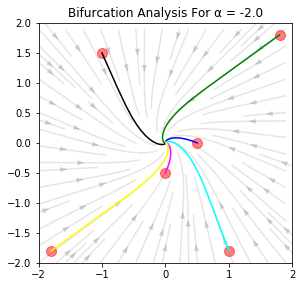

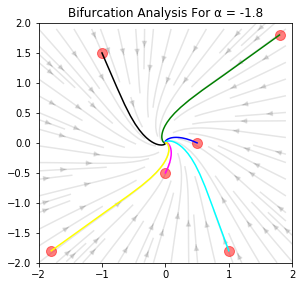

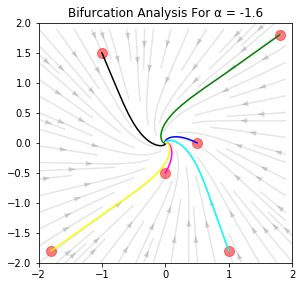

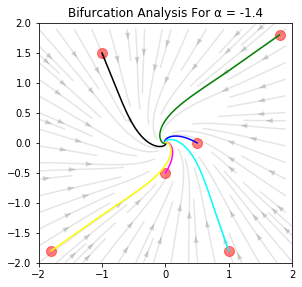

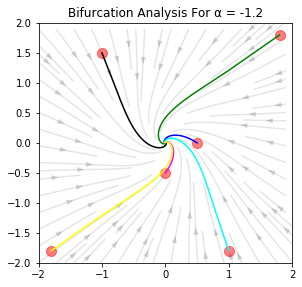

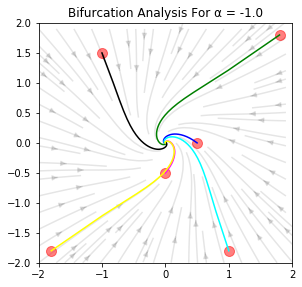

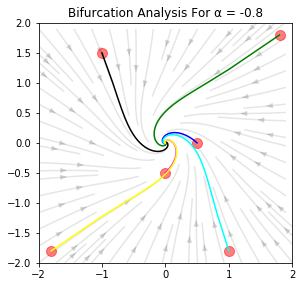

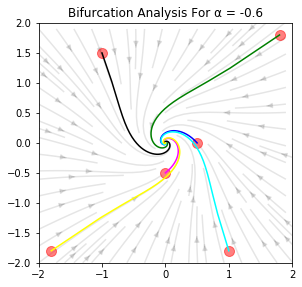

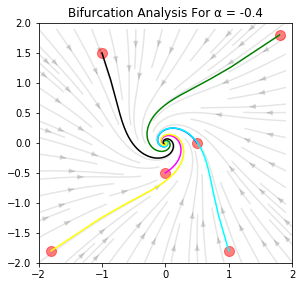

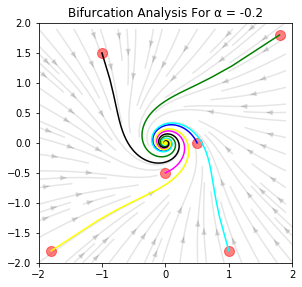

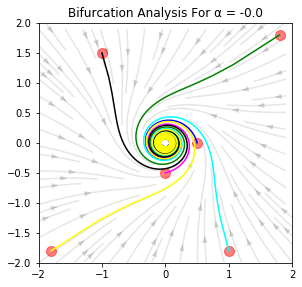

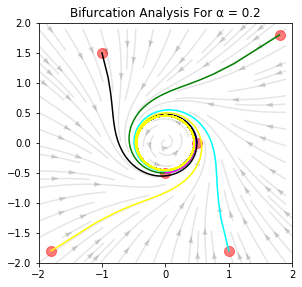

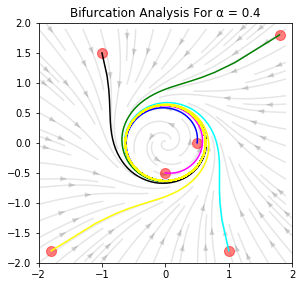

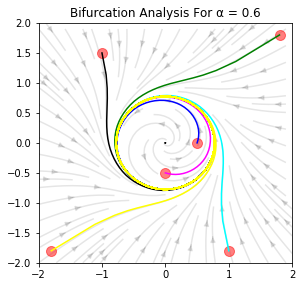

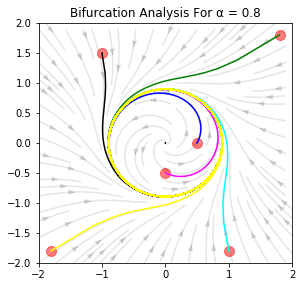

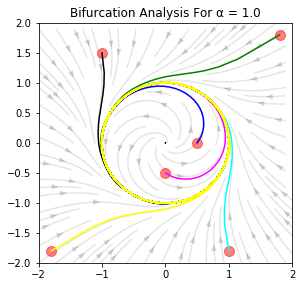

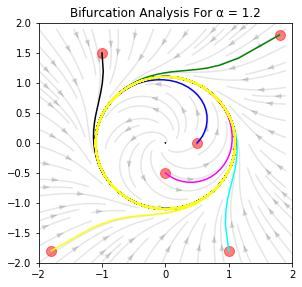

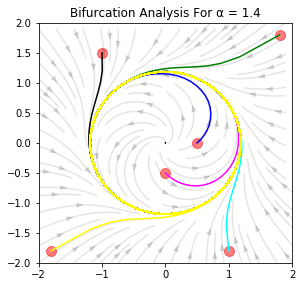

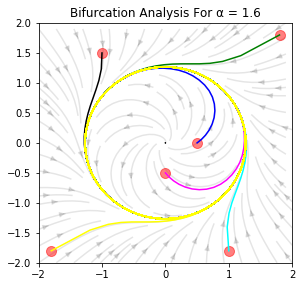

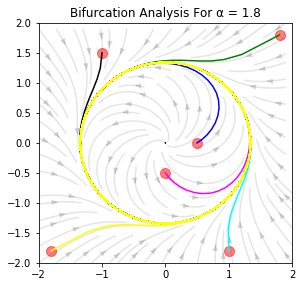

In [21]:
def f(t, r):
    x1, x2 = r
    f1 = alpha * x1 - x2 - x1*(np.square(x1) + np.square(x2))
    f2 = x1 + alpha * x2 - x2*(np.square(x1) + np.square(x2))
    return f1, f2

for alpha in np.arange(-2,2,0.2):
    sol = solve_ivp(f, (0, 100), (1.8, 1.8), t_eval=np.linspace(0, 100, 1000))
    xfr, yfr = sol.y

    sol = solve_ivp(f, (0, 100), (0.5, 0), t_eval=np.linspace(0, 100, 1000))
    xsc, ysc = sol.y
    
    sol = solve_ivp(f, (0, 100), (0, -0.5), t_eval=np.linspace(0, 100, 1000))
    xtr, ytr = sol.y

    sol = solve_ivp(f, (0, 100), (1, -1.8), t_eval=np.linspace(0, 100, 1000))
    xft, yft = sol.y
    
    sol = solve_ivp(f, (0, 100), (-1, 1.5), t_eval=np.linspace(0, 100, 1000))
    xfh, yfh = sol.y
    
    sol = solve_ivp(f, (0, 100), (-1.8, -1.8), t_eval=np.linspace(0, 100, 1000))
    xst, yst = sol.y

    U = alpha * x1 - x2 - x1*(np.square(x1) + np.square(x2))
    V = x1 + alpha * x2 - x2*(np.square(x1) + np.square(x2))

    fig = plt.figure(figsize=(10, 20))
    gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

    ax = fig.add_subplot(gs[0, 0])
    ax.streamplot(x1, x2, U, V, color=(0,0,0,.1))
    
    ax.plot([1.8], [1.8], 'ok', ms=10, color='r', alpha=0.5)
    ax.plot([0.5], [0], 'ok', ms=10, color='r', alpha=0.5)
    ax.plot([0], [-0.5], 'ok', ms=10, color='r', alpha=0.5)
    ax.plot([1], [-1.8], 'ok', ms=10, color='r', alpha=0.5)
    ax.plot([-1], [1.5], 'ok', ms=10, color='r', alpha=0.5)
    ax.plot([-1.8], [-1.8], 'ok', ms=10, color='r', alpha=0.5)
    
    ax.plot(xfr, yfr, color='green')
    ax.plot(xsc, ysc, color='blue')
    ax.plot(xtr, ytr, color='magenta')
    ax.plot(xft, yft, color='cyan')
    ax.plot(xfh, yfh, color='black')
    ax.plot(xst, yst, color='yellow')
    
    ax.set_title(f"Bifurcation Analysis For \u03B1 = {alpha:.1f}")

In [22]:
def f(t, r):
    x1, x2 = r
    f1 = alpha * x1 - x2 - x1*(np.square(x1) + np.square(x2))
    f2 = x1 + alpha * x2 - x2*(np.square(x1) + np.square(x2))
    return f1, f2

sol = solve_ivp(f, (0, 10), (2, 0), t_eval=np.linspace(0, 10, 100))
xf, yf = sol.y

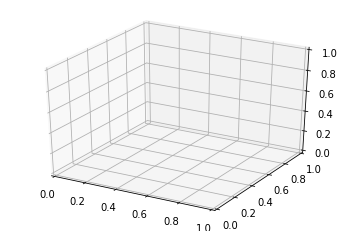

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [6]:
def f(a1, a2):
    return np.sin(np.sqrt(a1 ** 2 + a2 ** 2))

a1 = np.linspace(-6, 6, 30)
a2 = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(a1, a2)
Z = f(X, Y)

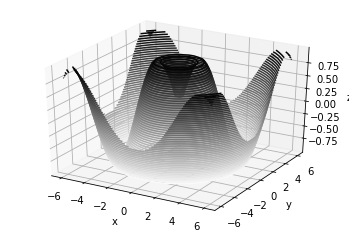

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

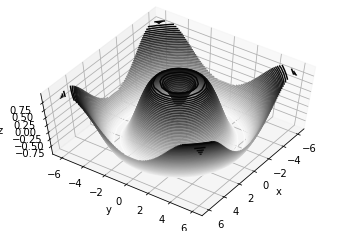

In [8]:
ax.view_init(60, 35)
fig